Stress is how we feel when something is hard or scary for us. Stress can be good or bad for our body and mind. When we are stressed, our body makes chemicals that help us deal with the situation. This is called the "fight or flight" response .

Stress can be good when it helps us to solve problems and reach our goals. But stress can be bad when it makes us feel too worried or lasts for too long. Too much stress can make us sick or unhappy, and can cause problems like headaches, sleeplessness, nervousness, sadness, and heart troubles .

Stress can come from different things, such as work, family, money, health, or bad events. Everyone feels stress differently, and some people can handle more stress than others. So, it is important to know what makes us stressed and how we show it, and to find ways to deal with it. Some ways to reduce stress are to relax, exercise, talk to friends, think positively, and get help from a professional if needed .

In [125]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/977.5 kB ? eta -:--:--
     - ------------------------------------- 30.7/977.5 kB 1.4 MB/s eta 0:00:01
     --- ----------------------------------- 92.2/977.5 kB 1.3 MB/s eta 0:00:01
     -------- ----------------------------- 225.3/977.5 kB 2.0 MB/s eta 0:00:01
     ------------ ------------------------- 327.7/977.5 kB 1.8 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/977.5 kB 2.0 MB/s eta 0:00:01
     --------------------- ---------------- 542.7/977.5 kB 2.3 MB/s eta 0:00:01
     --------------------------- ---------- 706.6/977.5 kB 2.3 MB/s eta 0:00:01
     --------------------------------- ---- 870.4/977.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  972.8/977.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 977.5/977.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use u

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nlp
from sklearn.model_selection import LearningCurveDisplay,train_test_split,GridSearchCV
from sklearn.svm import SVC
import plotly
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import re 
import string
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from transformers import BertTokenizer


In [434]:
# Load your dataset
data = pd.read_csv(r"C:\Users\itsla\Downloads\CapstoneProject\Stress.csv")

In [435]:
# def create_label(row):
#     if row['subreddit'] in ['ptsd', 'assistance', 'relationships', 'survivorsofabuse', 'domesticviolence']:
#         if row['confidence'] >= 0.8:
#             return 1  # Stress
#         else:
#             return 0  # No stress
#     elif row['subreddit'] in ['anxiety', 'homeless', 'stress', 'almosthomeless', 'food_pantry']:
#         if row['confidence'] >= 0.6:
#             return 1  # Stress
#         else:
#             return 0  # No stress
#     else:
#         return 0  # Default to No stress
# data['label'] = data.apply(create_label, axis=1)
# print(data)

In [436]:
# # Defining a function to create the label based on both the confidence score and the subreddit
# def create_stress_label(row, confidence_threshold=0.8, stress_subreddits={'ptsd', 'anxiety', 'domesticviolence'}):
#     # Label as stress if the confidence is above the threshold and the subreddit is one of the stress-related ones
#     if row['confidence'] > confidence_threshold and row['subreddit'] in stress_subreddits:
#         return 1
#     else:
#         return 0

# # Apply the function to the dataset
# data['label'] = data.apply(create_stress_label, axis=1)

# # Display the first few rows with the new 'label' column
# data.head()


In [437]:
data.iloc[:5] # Display the first five rows

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.80,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.00,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.80,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.60,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.80,1539809005


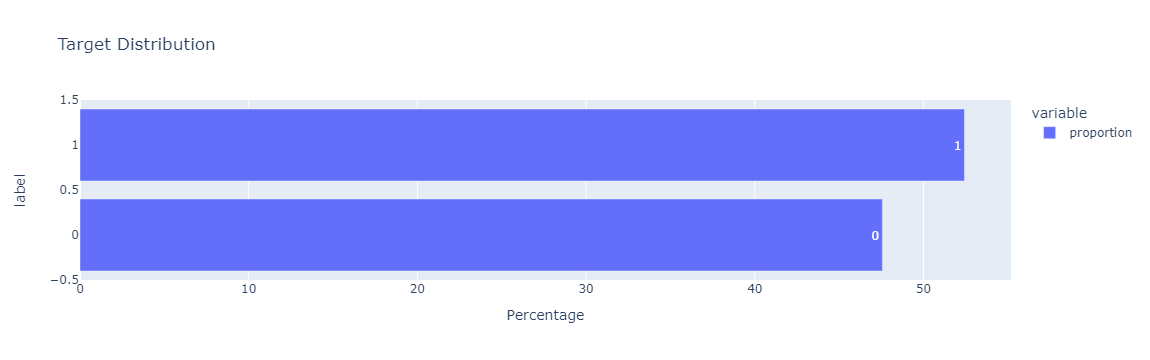

In [438]:
label_counts = data['label'].value_counts(normalize=True) * 100
fig = px.bar(label_counts,
             orientation='h',
             title='Target Distribution',
             labels={'value': 'Percentage', 'index': 'Label'},
             text=label_counts.index)
fig.update_traces(textposition='inside')
fig.show()

In [439]:
data['subreddit'].value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

In [440]:
data['label_in_value']=data['label'].map({0:'No Stress',1:"Stress"})

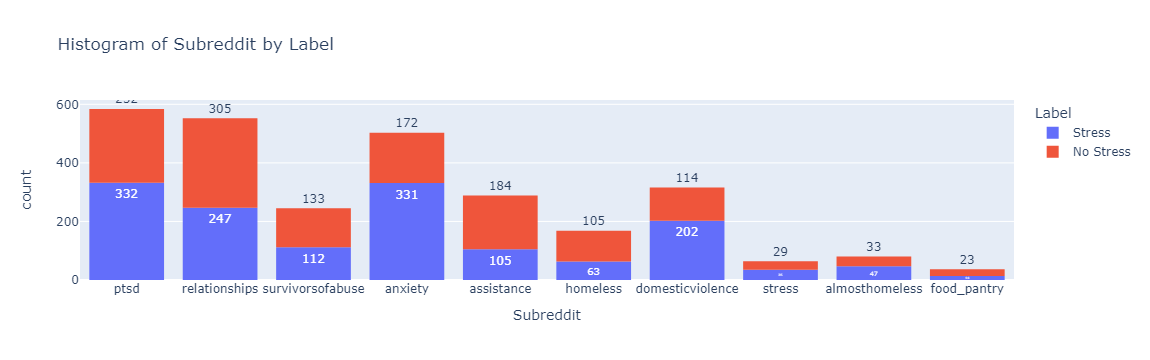

In [441]:
fig = px.histogram(data, x='subreddit', color='label_in_value', nbins=50,
                   title='Histogram of Subreddit by Label',
                   labels={'subreddit': 'Subreddit', 'label_in_value': 'Label'})
counts = data.groupby(['subreddit', 'label_in_value']).size().reset_index(name='count')
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

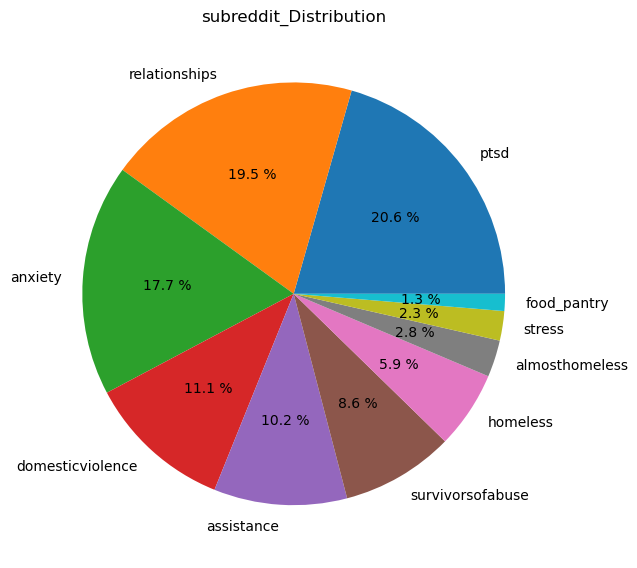

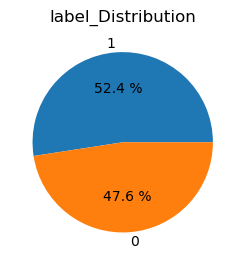

In [442]:
lst=['subreddit','label']
plt.figure(figsize=(15,12))
for i in range(len(lst)):
    plt.subplot(1,2,i+1)
    a=data[lst[i]].value_counts()
    lbl=a.index
    plt.title(lst[i]+'_Distribution')
    plt.pie(x=a,labels=lbl,autopct="%.1f %%")
    plt.show()

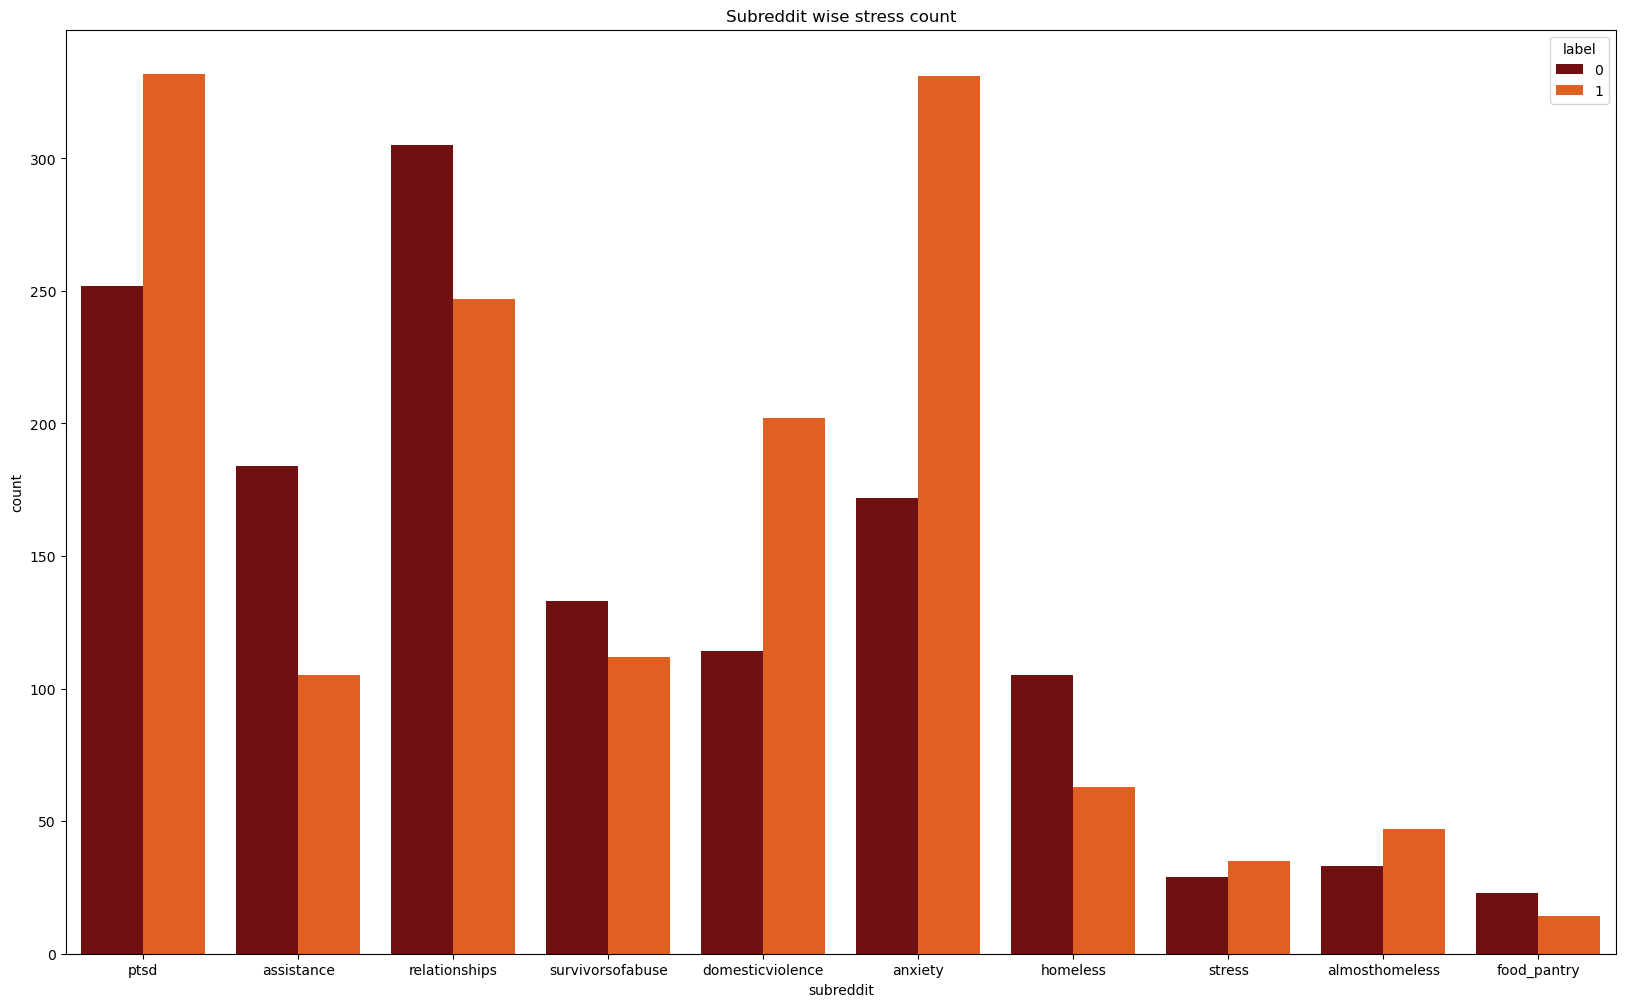

In [443]:
plt.figure(figsize=(20,12))
plt.title('Subreddit wise stress count')
plt.xlabel('Subreddit')
sns.countplot(data=data,x='subreddit',hue='label',palette='gist_heat')
plt.show()

In [444]:
# Step 1: Text Preprocessing
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [445]:
data['text'] = data['text'].apply(wordopt)

In [446]:
data['text']

0       he said he had not felt that way before  sugge...
1       hey there r assistance  not sure if this is th...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend  he is amazing  h...
4       october is domestic violence awareness month a...
                              ...                        
2833      her  a week ago  precious  how are you   i i...
2834    i don t have the ability to cope with it anymo...
2835    in case this is the first time you re reading ...
2836    do you find this normal  they have a good rela...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [447]:
data['text'] = data['text'].apply(word_tokenize)

In [448]:
data['text']

0       [he, said, he, had, not, felt, that, way, befo...
1       [hey, there, r, assistance, not, sure, if, thi...
2       [my, mom, then, hit, me, with, the, newspaper,...
3       [until, i, met, my, new, boyfriend, he, is, am...
4       [october, is, domestic, violence, awareness, m...
                              ...                        
2833    [her, a, week, ago, precious, how, are, you, i...
2834    [i, don, t, have, the, ability, to, cope, with...
2835    [in, case, this, is, the, first, time, you, re...
2836    [do, you, find, this, normal, they, have, a, g...
2837    [i, was, talking, to, my, mom, this, morning, ...
Name: text, Length: 2838, dtype: object

In [449]:
def remove_stopwords(text):
    stpw = set(stopwords.words('english'))
    filtered_text = [word for word in text if word not in stpw]
    return filtered_text

In [450]:
data['text'] = data['text'].apply(remove_stopwords)

In [451]:
data['text']

0       [said, felt, way, suggeted, go, rest, trigger,...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shocked, would, knows, l...
3       [met, new, boyfriend, amazing, kind, sweet, go...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignored, jan, happy, yea...
2834    [ability, cope, anymore, trying, lot, things, ...
2835    [case, first, time, reading, post, looking, pe...
2836    [find, normal, good, relationship, main, probl...
2837    [talking, mom, morning, said, sister, trauma, ...
Name: text, Length: 2838, dtype: object

In [452]:
def lemmatize_words(text):
    lemmer = WordNetLemmatizer()
    lemmatized_text = [lemmer.lemmatize(word, pos='v') for word in text]
    return lemmatized_text

In [453]:
data['text'] = data['text'].apply(lemmatize_words)

In [454]:
data['text']

0       [say, felt, way, suggeted, go, rest, trigger, ...
1       [hey, r, assistance, sure, right, place, post,...
2       [mom, hit, newspaper, shock, would, know, like...
3       [meet, new, boyfriend, amaze, kind, sweet, goo...
4       [october, domestic, violence, awareness, month...
                              ...                        
2833    [week, ago, precious, ignore, jan, happy, year...
2834    [ability, cope, anymore, try, lot, things, tri...
2835    [case, first, time, read, post, look, people, ...
2836    [find, normal, good, relationship, main, probl...
2837    [talk, mom, morning, say, sister, trauma, wors...
Name: text, Length: 2838, dtype: object

In [455]:
data['length'] = data['text'].apply(lambda x: len(x))

In [456]:
data['text'] = data['text'].apply(lambda x: ' '.join([index for index in x]))

In [457]:
# Step 2: Modeling
X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [458]:
# Step 3: Cross-validation for models
models = [RandomForestClassifier(), SVC(), KNeighborsClassifier()]
for model in models:
    pipeline = make_pipeline(TfidfVectorizer(), model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__} Cross-Validation Accuracy: {scores.mean():.4f}")

RandomForestClassifier Cross-Validation Accuracy: 0.6996
SVC Cross-Validation Accuracy: 0.7339
KNeighborsClassifier Cross-Validation Accuracy: 0.6665


In [459]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Define the pipeline with the TfidfVectorizer and the classifier
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'tfidfvectorizer__max_features': [None, 1000, 5000],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the performance on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set accuracy:", test_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 200, 'tfidfvectorizer__max_features': 5000, 'tfidfvectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.713215859030837
Test set accuracy: 0.6919014084507042


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Step 5: Visualizing Decision Regions with PCA
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Convert the sparse matrix to dense array
X_train_dense = X_train_tfidf.todense()

# Convert the dense matrix to NumPy array
X_train_array = np.array(X_train_dense)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_array)

for model in models:
    pipeline = make_pipeline(TfidfVectorizer(), model)
    pipeline.fit(X_train, y_train)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', legend='full')
    plt.title(f"Decision Regions - {model.__class__.__name__}")
    plt.show()

In [ ]:
# Step 6: Visualizing Feature Importance
for model in models:
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = TfidfVectorizer().fit(X_train).get_feature_names_out()
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
        plt.title(f"Feature Importance - {model.__class__.__name__}")
        plt.show()

In [ ]:
# Step 7: Classification Report and Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Models and their predictions
models = [RandomForestClassifier(), SVC(), KNeighborsClassifier()]
model_names = ['RandomForestClassifier', 'SVC', 'KNeighborsClassifier']

# Iterate through models and plot confusion matrix
for model, model_name in zip(models, model_names):
    pipeline = make_pipeline(TfidfVectorizer(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)


In [ ]:
# Step 8: Prediction on Trained Data
chosen_model = RandomForestClassifier(n_estimators=100)
final_pipeline = make_pipeline(TfidfVectorizer(), chosen_model)
final_pipeline.fit(X, y)

In [ ]:
# Save the model
import joblib
joblib.dump(final_pipeline, 'stress_detection_model.pkl')

In [ ]:
input=pd.DataFrame({
    'text':['i am going on a adventurous trip','Monday is a hard day to go to work','difficult']
})

In [ ]:
input

In [ ]:
# Preprocess the new data
input['text'] = input['text'].apply(word_tokenize)
input['text'] = input['text'].apply(remove_stopwords)
input['text'] = input['text'].apply(lemmatize_words)
input['text'] = input['text'].apply(lambda x: ' '.join([index for index in x]))

In [ ]:
vect=TfidfVectorizer(lowercase=False)

In [ ]:
X_valid=vect.fit_transform(input['text'])

In [ ]:
X_valid = vect.transform(input['text'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have the word_tokenize, remove_stopwords, and lemmatize_words functions defined
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return ' '.join(tokens)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Assuming you have a trained pipeline with SVC
pipeline = make_pipeline(TfidfVectorizer(), SVC())
pipeline.fit(X_train, y_train)

# Assuming X_valid is your new data
X_valid = input['text'].apply(preprocess_text)

# Predict on the new data
input['predicted'] = pipeline.predict(X_valid)
input['predicted'] = input['predicted'].apply(lambda x: 'Stress' if x == 1 else 'Not Stress')


In [ ]:
input

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

# Assuming X_train and X_test are your text data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert the sparse matrices to dense arrays
X_train_dense = X_train_tfidf.todense()
X_test_dense = X_test_tfidf.todense()

# Convert dense arrays to Pandas DataFrames
X_train_df = pd.DataFrame(X_train_dense, columns=tfidf.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_dense, columns=tfidf.get_feature_names_out())

# LazyPredict with DataFrame data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_df, X_test_df, y_train, y_test)

# Display the results
print(models)
